## 讀取訓練資料集

In [61]:
import pandas as pd
trainset = pd.read_csv('Lab3/Training50.csv')
trainset.columns

Index([u'Unnamed: 0', u'Creditability', u'Account.Balance',
       u'Duration.of.Credit..month.', u'Payment.Status.of.Previous.Credit',
       u'Purpose', u'Credit.Amount', u'Value.Savings.Stocks',
       u'Length.of.current.employment', u'Instalment.per.cent',
       u'Sex...Marital.Status', u'Guarantors', u'Duration.in.Current.address',
       u'Most.valuable.available.asset', u'Age..years.', u'Concurrent.Credits',
       u'Type.of.apartment', u'No.of.Credits.at.this.Bank', u'Occupation',
       u'No.of.dependents', u'Telephone', u'Foreign.Worker'],
      dtype='object')

In [62]:
trainset.isnull().values.any()

False

In [63]:
trainset.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,...,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,497,1,3,6,2,3,2108,1,3,2,...,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,...,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,...,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,...,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,...,2,2,30,2,2,2,1,1,1,1


In [64]:
cat_var = [u'Account.Balance', u'Payment.Status.of.Previous.Credit',
       u'Purpose', u'Value.Savings.Stocks',
       u'Length.of.current.employment', u'Instalment.per.cent',
       u'Sex...Marital.Status', u'Guarantors', u'Duration.in.Current.address',
       u'Most.valuable.available.asset', u'Concurrent.Credits',
       u'Type.of.apartment', u'No.of.Credits.at.this.Bank', u'Occupation',
       u'No.of.dependents', u'Telephone', u'Foreign.Worker']

num_var = [u'Duration.of.Credit..month.', u'Credit.Amount', u'Age..years.']

In [65]:
train_df = trainset['Creditability']

for var in cat_var:
    train_df = pd.concat([train_df,pd.get_dummies(trainset[var])],axis=1)

train_df = pd.concat([train_df,trainset[num_var]],axis=1)

## 讀取測試資料集

In [44]:
import pandas as pd
testset = pd.read_csv('Lab3/Test50.csv')
testset.columns

Index([u'Unnamed: 0', u'Creditability', u'Account.Balance',
       u'Duration.of.Credit..month.', u'Payment.Status.of.Previous.Credit',
       u'Purpose', u'Credit.Amount', u'Value.Savings.Stocks',
       u'Length.of.current.employment', u'Instalment.per.cent',
       u'Sex...Marital.Status', u'Guarantors', u'Duration.in.Current.address',
       u'Most.valuable.available.asset', u'Age..years.', u'Concurrent.Credits',
       u'Type.of.apartment', u'No.of.Credits.at.this.Bank', u'Occupation',
       u'No.of.dependents', u'Telephone', u'Foreign.Worker'],
      dtype='object')

In [58]:
testset = pd.read_csv('Lab3/Test50.csv')

In [59]:
cat_var = [u'Account.Balance', u'Payment.Status.of.Previous.Credit',
       u'Purpose', u'Value.Savings.Stocks',
       u'Length.of.current.employment', u'Instalment.per.cent',
       u'Sex...Marital.Status', u'Guarantors', u'Duration.in.Current.address',
       u'Most.valuable.available.asset', u'Concurrent.Credits',
       u'Type.of.apartment', u'No.of.Credits.at.this.Bank', u'Occupation',
       u'No.of.dependents', u'Telephone', u'Foreign.Worker']

num_var = [u'Duration.of.Credit..month.', u'Credit.Amount', u'Age..years.']

In [60]:
test_df = testset['Creditability']

for var in cat_var:
    test_df = pd.concat([test_df,pd.get_dummies(testset[var])],axis=1)

test_df = pd.concat([test_df,trainset[num_var]],axis=1)

In [68]:
train_df['Creditability'].head()

0    1
1    0
2    0
3    0
4    1
Name: Creditability, dtype: int64

## 建立多個模型

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(LogisticRegression())
models.append(RandomForestClassifier(n_estimators=100, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(GaussianNB())

for model in models:
    model.fit(train_df.drop('Creditability', axis=1), train_df['Creditability'])

## 繪製ROC Curve

Populating the interactive namespace from numpy and matplotlib


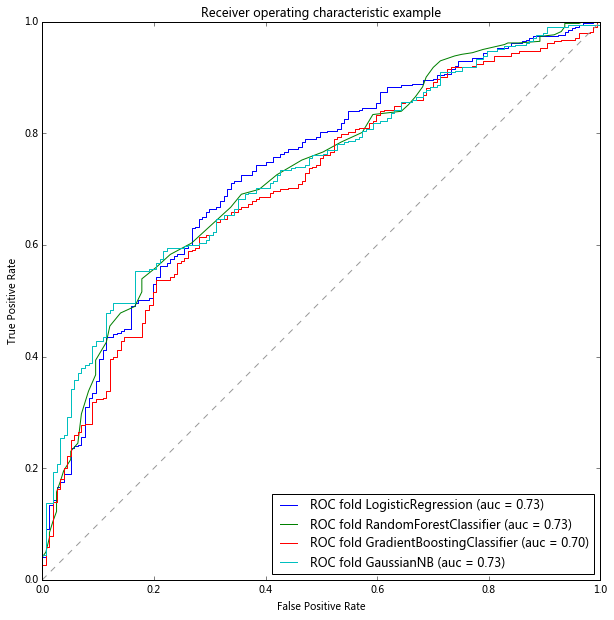

In [77]:
%pylab inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

def roc_comparison(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 10)) 
    for model in models:
        pred_scr = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred_scr)
        roc_auc =  auc(fpr, tpr)
        md = str(model)
        md = md[:md.find('(')]
        plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))
        

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
roc_comparison(models, train_df.drop('Creditability', axis=1), test_df.drop('Creditability', axis=1), train_df['Creditability'], test_df['Creditability'])